In [1]:
import os
import pickle
import numpy as np
from matplotlib import pyplot as plt

os.chdir("../../")
cwd = os.getcwd()
from src.gpdssm.utils import get_random_state

In [2]:
Dx = 2
Dy = 20
N = 10000
X = [[0.0, 0.0]]
Y = []

random_state = get_random_state()
A = random_state.normal(0, 1, (Dy, Dx))
B = random_state.beta(1, 1, (Dy, Dx))
print(A)
print(B)

[[-1.41094505 -0.28032189]
 [-0.03494765 -0.30044379]
 [-1.30650098  1.08115439]
 [-0.16293451 -0.56881247]
 [-0.60694696 -0.61414772]
 [-0.65985294 -0.07313611]
 [-0.03506899 -0.47074184]
 [ 1.72573683  1.56441685]
 [-0.31284528 -1.43760243]
 [-0.00627151 -0.42461477]
 [-0.8945135  -0.68250462]
 [-0.94709728 -0.97086767]
 [-0.10345954  0.49339449]
 [-0.48054342  0.44994435]
 [-0.63466857 -0.24541432]
 [ 0.01200074  1.9157116 ]
 [-0.67705252 -1.46859077]
 [-3.01300644  0.06440663]
 [-0.78836312  0.03004937]
 [ 0.99807214 -0.83804513]]
[[0.78715454 0.04856194]
 [0.98615305 0.06375284]
 [0.91034949 0.94932778]
 [0.88866369 0.8036379 ]
 [0.77525846 0.84176781]
 [0.06024011 0.13641323]
 [0.35125258 0.95057436]
 [0.07921395 0.5208154 ]
 [0.63292241 0.58951191]
 [0.57725173 0.5220166 ]
 [0.98525997 0.6715595 ]
 [0.36625659 0.81886102]
 [0.41442334 0.73857791]
 [0.64453103 0.15681409]
 [0.1812051  0.25109472]
 [0.80109444 0.1796397 ]
 [0.32426915 0.40133216]
 [0.2486558  0.21145223]
 [0.23560

In [3]:
N = 10000

In [4]:
def x_process(x):
    x_next_1 = 0.9 * x[0] + 0.5 * np.sin(x[1]) + random_state.normal(0., 1.0e-2)
    x_next_2 = 0.5 * np.cos(x[0]) + 0.9 * x[1] + random_state.normal(0., 1.0e-2)
    return [x_next_1, x_next_2]

def generate_x_process(T):
    for t in range(T):
        x_next = x_process(X[-1])
        X.append(x_next)

In [5]:
generate_x_process(N)
X = np.array(X)

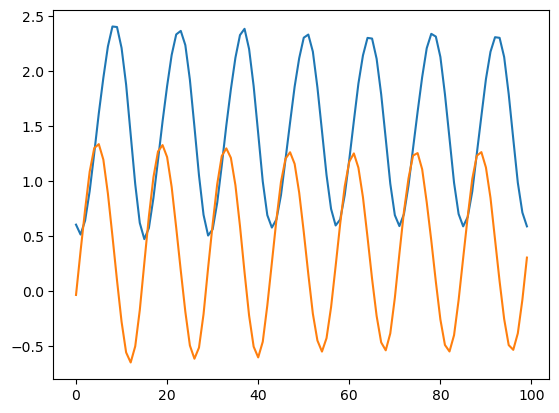

In [6]:
plt.plot(X[-100:, :])
plt.savefig(os.path.join(cwd, "plots", "x21.png"))

In [7]:
def y_process(x):
    y = 0.5 * np.dot(A, x) + np.sin(np.dot(B, x)) + np.random.normal(0., 0.01, Dy)
    return y

def generate_y_process(T):
    for t in range(T):
        y_next = y_process(X[t+1])
        Y.append(y_next)

In [8]:
generate_y_process(N)
Y = np.array(Y)

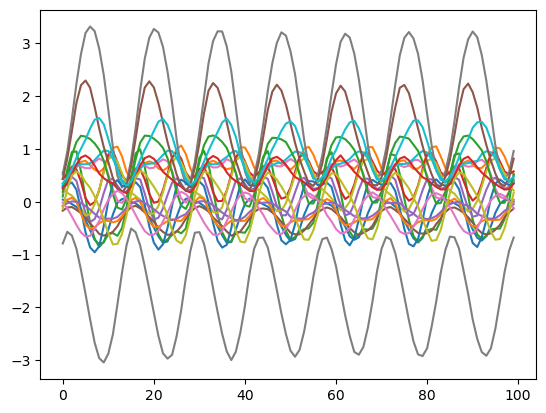

In [9]:
plt.plot(Y[-100:, :])
plt.savefig(os.path.join(cwd, "plots", "y21.png"))

In [10]:
cwd = os.getcwd()
Y_path = os.path.join(cwd, "folds", "train_fold_21_Y.txt")
np.savetxt(Y_path, Y)

In [11]:
X_path = os.path.join(cwd, "folds", "train_fold_21_X.pickle")
with open(X_path, 'wb') as f:
    pickle.dump([X], f)

In [12]:
# cwd = os.getcwd()
# X_path = os.path.join(cwd, "folds", "%s_fold_%s_X.pickle" % ('x2y3', 1)) #os.path.join(cwd, "folds", "x2y3_fold_1_X.pickle")
# with open(X_path, 'rb') as f:
#     X_test = pickle.load(f)